Assignment-4
1. Create a random dataset of 100 rows and 30 columns, all the values are defined between [1,200] and perform the following operations: 
1.	Replace all the values with NA in the dataset defined between[10,60]. Print the count of NAss in each row and each column. 
2.	Replace all the NA values with the average of the column values. 
3.	Plot heat map.
4.	Count the number of columns having correlation <=0.7 
5.	Normalize each column in the dataset between 0 and 10. 
6.	Replace all the values in the dataset with 0 if value <=5 else with 1. 4. Visualizing the distribution of a dataset. 
Pratice the tutorial given in the below link https://seaborn.pydata.org/tutorial/distributions.html 



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(43)

In [8]:
data=np.random.randint(1,200,size=(100,30))
data=pd.DataFrame(data)
# print("generated data is :\n",data)


data = data.astype(float) 
data[(data > 10) & (data < 60) ]=np.nan

nan_count_in_row=data.isna().sum(axis=1)
nan_count_in_column=data.isna().sum(axis=0)
# print("\nNaN counts in each row:\n", nan_count_in_row)
# print("NaN counts in each column:\n", nan_count_in_column)


print(data.describe())
data=data.fillna(data.mean())
print("after filling each nan value with the average column mean : \n",data)




               0           1           2           3           4           5   \
count   73.000000   75.000000   65.000000   68.000000   80.000000   76.000000   
mean   117.767123  115.120000  112.000000  114.823529  123.625000  123.407895   
std     50.448962   55.704326   54.713744   44.901199   51.572089   48.970788   
min      2.000000    2.000000    1.000000    1.000000    2.000000    2.000000   
25%     85.000000   89.000000   77.000000   88.500000   86.500000   85.000000   
50%    119.000000  126.000000  121.000000  112.500000  124.000000  124.500000   
75%    157.000000  153.000000  153.000000  146.250000  165.500000  166.500000   
max    199.000000  198.000000  193.000000  193.000000  197.000000  196.000000   

               6           7           8           9   ...          20  \
count   83.000000   70.000000   79.000000   80.000000  ...   78.000000   
mean   126.590361  119.028571  115.658228  126.675000  ...  128.025641   
std     48.803997   54.962958   53.727920   47.7

<Axes: >

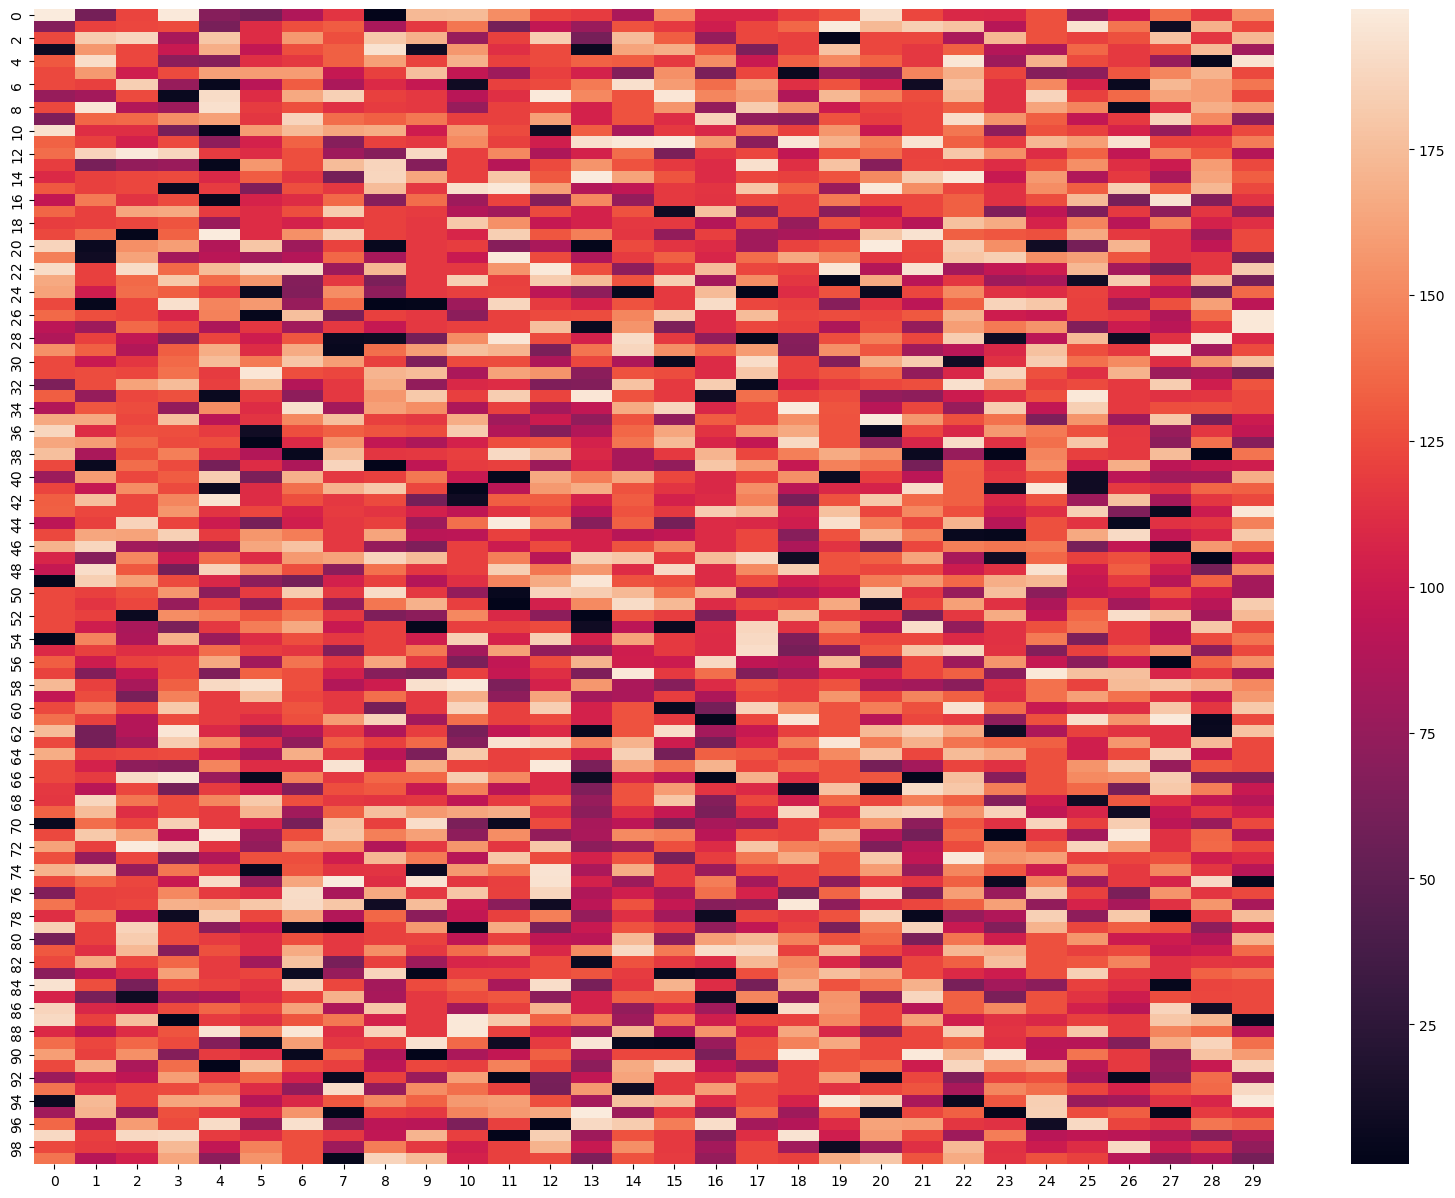

In [46]:
plt.figure(figsize=(20,15))
sns.heatmap(data)

In [13]:
corr_matrix=data.corr()
print("corr matrix is :\n",corr_matrix)
columns_with_low_corr=(corr_matrix<=0.7).sum(axis=0)-1
print("column with low correlation :\n",column_with_low_corr)
count = (columns_with_low_corr > 0).sum()
print("Number of columns having correlation <= 0.7 with at least one other column:", count)

corr matrix is :
           0         1         2         3         4         5         6   \
0   1.000000 -0.033807 -0.052164  0.020370 -0.016375  0.130695  0.026890   
1  -0.033807  1.000000 -0.018427  0.075719 -0.051072  0.003938 -0.199845   
2  -0.052164 -0.018427  1.000000 -0.060691 -0.013592 -0.093239  0.011761   
3   0.020370  0.075719 -0.060691  1.000000  0.018374 -0.055685 -0.051969   
4  -0.016375 -0.051072 -0.013592  0.018374  1.000000 -0.017618 -0.030947   
5   0.130695  0.003938 -0.093239 -0.055685 -0.017618  1.000000  0.008799   
6   0.026890 -0.199845  0.011761 -0.051969 -0.030947  0.008799  1.000000   
7   0.076446  0.054240  0.004820 -0.116220  0.065293 -0.078441 -0.100549   
8  -0.100631 -0.003772 -0.033481  0.131814 -0.004805 -0.024733  0.049808   
9   0.007984 -0.090640 -0.014504  0.033220 -0.067118  0.006438 -0.126780   
10 -0.018875  0.162982  0.104205 -0.088130  0.032542 -0.011012 -0.079350   
11 -0.018050  0.041134 -0.119487  0.067100 -0.020160 -0.042125 -0.0001

In [17]:
data_normalized=(data-data.min())/(data.max()-data.min())*10
print("data normalize :\n",data_normalized)

data normalize :
            0         1         2         3         4         5         6   \
0    3.401015  3.214286  5.781250  5.928309  6.237179  6.258139  6.356651   
1    5.876504  3.010204  5.833333  3.802083  8.256410  6.258139  9.132653   
2    0.304569  3.061224  5.156250  6.145833  6.237179  8.298969  8.826531   
3   10.000000  7.295918  5.781250  5.625000  3.179487  6.391753  7.908163   
4    5.876504  5.771429  5.781250  8.750000  6.256410  9.587629  5.459184   
..        ...       ...       ...       ...       ...       ...       ...   
95   5.380711  7.244898  6.302083  5.260417  6.237179  3.608247  9.387755   
96   5.876504  9.081633  6.197917  6.197917  9.282051  4.278351  5.051020   
97   7.614213  7.704082  9.218750  9.322917  7.589744  8.608247  9.489796   
98   7.868020  6.377551  8.020833  5.928309  6.237179  6.258139  4.336735   
99   5.876504  0.102041  3.177083  3.906250  4.102564  7.061856  8.010204   

           7          8         9   ...        20        

In [19]:
data_replaced=data.copy()

data_replaced=np.where(data_replaced<=5,0,1)
data_replaced=pd.DataFrame(data_replaced,columns=data.columns)
data_replaced


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
96,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
97,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
98,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


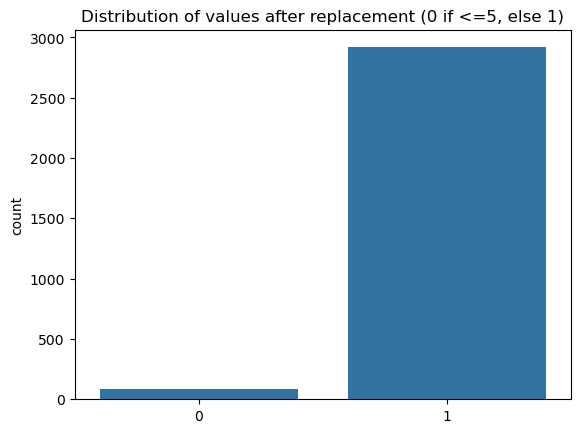

In [21]:
import matplotlib.pyplot as pyplot 
import seaborn as sns

values=data_replaced.values.flatten()

# Count distribution
sns.countplot(x=values)
plt.title("Distribution of values after replacement (0 if <=5, else 1)")
plt.show()